# 5 Class Star Classifier Using Deep Neural Networks 

## -- Neccessary modules 

In [1]:
import tensorflow as tf 
from tensorflow import keras
from sklearn import preprocessing, model_selection
import numpy as np 
import pandas as pd 

## -- Loading dataset of stars from CSV

In [2]:
df = pd.read_csv('C:\\Users\\User1\\Desktop\\Star Classifier\\5 Class Classification of stars\\5 class.csv')

In [3]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.91,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


## Lower part of dataset

In [4]:
df.tail()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
195,38940,374830.0,1356.0,-9.93,4,Blue,O
196,30839,834042.0,1194.0,-10.63,4,Blue,O
197,8829,537493.0,1423.0,-10.73,4,White,A
198,9235,404940.0,1112.0,-11.23,4,White,A
199,37882,294903.0,1783.0,-7.80,4,Blue,O


## Checking For Any NULL Values

In [5]:
df.isnull().values.any()

False

## Checking Correlation of dataset to check for redundant columns

In [6]:
df.corr()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
Temperature (K),1.000000,0.479379,0.149509,-0.375972,0.457628
Luminosity(L/Lo),0.479379,1.000000,0.514297,-0.766101,0.684232
Radius(R/Ro),0.149509,0.514297,1.000000,-0.685325,0.711140
Absolute magnitude(Mv),-0.375972,-0.766101,-0.685325,1.000000,-0.921291
Star type,0.457628,0.684232,0.711140,-0.921291,1.000000


## Visualizing Correlation of columns

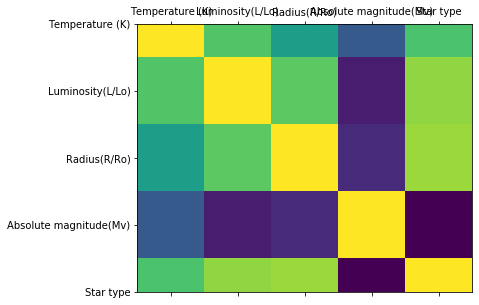

In [8]:
import matplotlib.pyplot as plt

def plot_corr(df):
    corr = df.corr()
    fig,ax = plt.subplots(figsize = (6,6))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    
    
plot_corr(df)  

## Checking Stats about the dataset

In [10]:
# star class:  Star Type
#     0     :  Brown Dwarf
#     1     :  Red Dwarf
#     2     :  White Dwarf
#     3     :  Supergiant
#     4     :  Hypergiant

In [11]:
brown_dwarf = len(df.loc[df['Star type'] == 0])
red_dwarf = len(df.loc[df['Star type'] == 1])
white_dwarf = len(df.loc[df['Star type'] == 2])
supergiant = len(df.loc[df['Star type'] == 3])
hypergiant = len(df.loc[df['Star type'] == 4])

print("Brown dwarf = {} = {}% ".format(brown_dwarf,brown_dwarf/(brown_dwarf+red_dwarf+white_dwarf+supergiant+hypergiant)))
print("red_dwarf  = {} = {}% ".format(red_dwarf ,red_dwarf/(brown_dwarf+red_dwarf+white_dwarf+supergiant+hypergiant)))
print("white_dwarf = {} = {}% ".format(white_dwarf,white_dwarf/(brown_dwarf+red_dwarf+white_dwarf+supergiant+hypergiant)))
print("supergiant= {} = {}% ".format(supergiant,supergiant/(brown_dwarf+red_dwarf+white_dwarf+supergiant+hypergiant)))
print("hypergiant = {} = {}% ".format(hypergiant,hypergiant/(brown_dwarf+red_dwarf+white_dwarf+supergiant+hypergiant))) 
print("Total stars = {}".format(len(df)))

Brown dwarf = 40 = 0.2% 
red_dwarf  = 40 = 0.2% 
white_dwarf = 40 = 0.2% 
supergiant= 40 = 0.2% 
hypergiant = 40 = 0.2% 
Total stars = 200


## -- Converting Data into Numpy Arrays ( For Sake of Convenience)

In [12]:
x = np.array(df.drop(['Star type', 'Star color','Spectral Class'],1))   # Excludes Star type, Star color and Spectral Class
y = np.array(df['Star type'], dtype ='float')                           # Only Star type column
y.shape = (len(y),1)                                                    # Shaping the star type column into a column vector

## -- Splitting Data into Training And Testing Datasets

In [13]:
x_train ,x_test , y_train, y_test = model_selection.train_test_split(x,y, test_size = 0.3) 

## -- Scaling Data for Better Modelling (Only x values)

In [14]:
x_f_train = preprocessing.scale(x_train)
x_f_test = preprocessing.scale(x_test)
y_f_train = y_train
y_f_test = y_test

## -- Using DNN Model for Training Data 

In [15]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(200,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(300,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(5,activation = tf.nn.softmax))


model.compile(optimizer = tf.train.AdamOptimizer(),
       loss = 'sparse_categorical_crossentropy',
       metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## -- Fitting Data into Model 

In [16]:
model.fit(x_f_train,y_f_train, epochs = 100)

Epoch 1/100
140/140 [==============================] - 1s 4ms/sample - loss: 1.4846 - acc: 0.4500
Epoch 2/100
140/140 [==============================] - 0s 89us/sample - loss: 1.1707 - acc: 0.8000
Epoch 3/100
140/140 [==============================] - 0s 114us/sample - loss: 0.9517 - acc: 0.7357
Epoch 4/100
140/140 [==============================] - 0s 143us/sample - loss: 0.7871 - acc: 0.7857
Epoch 5/100
140/140 [==============================] - 0s 128us/sample - loss: 0.6516 - acc: 0.7929
Epoch 6/100
140/140 [==============================] - 0s 107us/sample - loss: 0.5502 - acc: 0.8000
Epoch 7/100
140/140 [==============================] - 0s 128us/sample - loss: 0.4752 - acc: 0.8143
Epoch 8/100
140/140 [==============================] - 0s 114us/sample - loss: 0.4234 - acc: 0.8429
Epoch 9/100
140/140 [==============================] - 0s 114us/sample - loss: 0.3793 - acc: 0.9143
Epoch 10/100
140/140 [==============================] - 0s 185us/sample - loss: 0.3462 - acc: 0.9214
Ep

Epoch 82/100
140/140 [==============================] - 0s 71us/sample - loss: 0.0157 - acc: 1.0000
Epoch 83/100
140/140 [==============================] - 0s 78us/sample - loss: 0.0170 - acc: 1.0000
Epoch 84/100
140/140 [==============================] - 0s 71us/sample - loss: 0.0158 - acc: 1.0000
Epoch 85/100
140/140 [==============================] - 0s 92us/sample - loss: 0.0168 - acc: 1.0000
Epoch 86/100
140/140 [==============================] - 0s 85us/sample - loss: 0.0135 - acc: 1.0000
Epoch 87/100
140/140 [==============================] - 0s 64us/sample - loss: 0.0128 - acc: 1.0000
Epoch 88/100
140/140 [==============================] - 0s 64us/sample - loss: 0.0139 - acc: 1.0000
Epoch 89/100
140/140 [==============================] - 0s 93us/sample - loss: 0.0132 - acc: 1.0000
Epoch 90/100
140/140 [==============================] - 0s 92us/sample - loss: 0.0127 - acc: 1.0000
Epoch 91/100
140/140 [==============================] - 0s 99us/sample - loss: 0.0120 - acc: 1.0000


## -- Checking Trained Data For Overfitting and Underfitting over tested data

In [17]:
val_loss,val_acc = model.evaluate(x_f_test,y_f_test)
print("Loss % = {} , Accuracy % = {} ".format(val_loss*100,val_acc*100))

60/60 [==============================] - 0s 847us/sample - loss: 0.0078 - acc: 1.0000
Loss % = 0.7844262880583603 , Accuracy % = 100.0 


## -- Predicting Star Type of Test Data from Trained Data 

In [18]:
# [1,0,0,0,0] = Brown Dwarf
# [0,1,0,0,0] = Red Dwarf
# [0,0,1,0,0] = White Dwarf
# [0,0,0,1,0] = Supergiant
# [0,0,0,0,1] = Hypergiant

arr = np.array([[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]])

In [19]:
z = np.round(model.predict(x_f_test))

print('_____________________________________________________')
print("Prediction : P-Class : O-Class ")

c1=c2=c3=c4=c5=c6=c7=c8=c9=c10=0  #counter variables

for i in range(0,len(z)):
    if np.array_equal(z[i],arr[0]):
        print("{}  :  {} :  {}".format(z[i],0,y_test[i]))
        c1+=1
    elif np.array_equal(z[i],arr[1]):
        print("{}  :  {} :  {}".format(z[i],1,y_test[i]))
        c2+=1
    elif np.array_equal(z[i],arr[2]):
        print("{}  :  {} :  {}".format(z[i],2,y_test[i]))
        c3+=1  
    elif np.array_equal(z[i],arr[3]):
        print("{}  :  {} :  {}".format(z[i],3,y_test[i]))
        c4+=1 
    elif np.array_equal(z[i],arr[4]):
        print("{}  :  {} :  {}".format(z[i],4,y_test[i]))
        c5+=1 

print('_____________________________________________________')
print("Predicted NO. of Brown Dwarfs = {}".format(c1))
print("Predicted NO. of Red Dwarfs = {}".format(c2))
print("Predicted NO. of White Dwarfs = {}".format(c3))
print("Predicted NO. of Supergiants = {}".format(c4))
print("Predicted NO. of Hypergiants = {}".format(c5))
print("Total tested stars = {}".format(len(z)))

m = y_test

print('_____________________________________________________')

for i in range(0,len(m)):
    if m[i] == 0:
        c6+=1
    elif m[i] == 1 :
        c7+=1 
    elif m[i] == 2 :
        c8+=1 
    elif m[i] == 3 :
        c9+=1 
    elif m[i] == 4 :
        c10+=1 


print("Original NO. of Brown Dwarfs = {}".format(c6))
print("Original NO. of Red Dwarfs = {}".format(c7))
print("Original NO. of White Dwarfs = {}".format(c8))
print("Original NO. of Supergiants = {}".format(c9))
print("Original NO. of Hypergiants = {}".format(c10))
print("Total tested stars = {}".format(len(x_test)))

print('_____________________________________________________')
print('Accuracy = {}%'.format((val_acc*100)))

_____________________________________________________
Prediction : P-Class : O-Class 
[0. 0. 0. 0. 1.]  :  4 :  [4.]
[1. 0. 0. 0. 0.]  :  0 :  [0.]
[0. 1. 0. 0. 0.]  :  1 :  [1.]
[0. 0. 1. 0. 0.]  :  2 :  [2.]
[0. 0. 0. 0. 1.]  :  4 :  [4.]
[0. 1. 0. 0. 0.]  :  1 :  [1.]
[0. 1. 0. 0. 0.]  :  1 :  [1.]
[1. 0. 0. 0. 0.]  :  0 :  [0.]
[0. 0. 1. 0. 0.]  :  2 :  [2.]
[1. 0. 0. 0. 0.]  :  0 :  [0.]
[0. 1. 0. 0. 0.]  :  1 :  [1.]
[0. 1. 0. 0. 0.]  :  1 :  [1.]
[0. 0. 0. 1. 0.]  :  3 :  [3.]
[0. 0. 0. 1. 0.]  :  3 :  [3.]
[1. 0. 0. 0. 0.]  :  0 :  [0.]
[0. 0. 0. 1. 0.]  :  3 :  [3.]
[0. 1. 0. 0. 0.]  :  1 :  [1.]
[0. 0. 0. 0. 1.]  :  4 :  [4.]
[0. 0. 0. 0. 1.]  :  4 :  [4.]
[0. 0. 1. 0. 0.]  :  2 :  [2.]
[0. 0. 0. 0. 1.]  :  4 :  [4.]
[0. 1. 0. 0. 0.]  :  1 :  [1.]
[0. 1. 0. 0. 0.]  :  1 :  [1.]
[0. 0. 0. 1. 0.]  :  3 :  [3.]
[0. 0. 1. 0. 0.]  :  2 :  [2.]
[0. 0. 0. 0. 1.]  :  4 :  [4.]
[0. 0. 1. 0. 0.]  :  2 :  [2.]
[0. 0. 0. 1. 0.]  :  3 :  [3.]
[0. 0. 0. 1. 0.]  :  3 :  [3.]
[0. 0. 0. 0. 1.

# Data Visualization

In [20]:
import matplotlib.pyplot as plt

## -- Plotting Original data of Stars

Total Counted Stars = 200


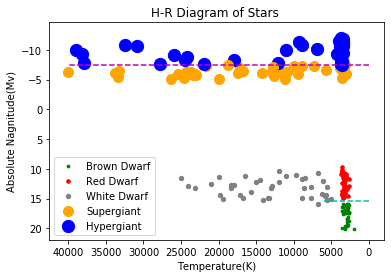

In [21]:
df1 = pd.read_csv('C:\\Users\\User1\\Desktop\\Multi class classifier\\5 class classifier\\5 class.csv')

## data plotting

x1 = np.array(df1.drop(['Star color','Spectral Class'],1))
y1 = np.array(df1['Star type'], dtype ='float')
y1.shape = (len(y1),1)
c1 =0

for i in range(0,len(x1)):
    if x1[i][4] == 0:
        a = plt.scatter(x1[i][0],x1[i][3], s = 30 , c = 'green', marker = '.')
    elif x1[i][4]== 1:
        b = plt.scatter(x1[i][0],x1[i][3],s = 50 , c = 'red',marker = '.')
    elif x1[i][4]== 2:
        c = plt.scatter(x1[i][0],x1[i][3],s = 75 , c = 'gray',marker = '.')
    elif x1[i][4]== 3:
        d = plt.scatter(x1[i][0],x1[i][3],s = 100 , c = 'orange',marker = 'o') 
    elif x1[i][4]== 4:
        e = plt.scatter(x1[i][0],x1[i][3],s = 150 , c = 'blue',marker = 'o')       
    c1+=1


print("Total Counted Stars = {}".format(c1)) 
plt.xlabel("Temperature(K)")
plt.ylabel("Absolute Nagnitude(Mv)")
plt.title("H-R Diagram of Stars ")
plt.legend((a,b,c,d,e),('Brown Dwarf','Red Dwarf','White Dwarf','Supergiant','Hypergiant'))
m = np.linspace(0,40000,100)
n = (0*m) -7.5
plt.plot(m,n,'--m')
f = np.linspace(0,6000,100)
g = (0*f)+15.4
plt.plot(f,g,'--c')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

In [22]:
# Dashed line indicates the class boundary that separates some of the classes

## -- Visualizing Trained Data

Total Trained Stars = 140


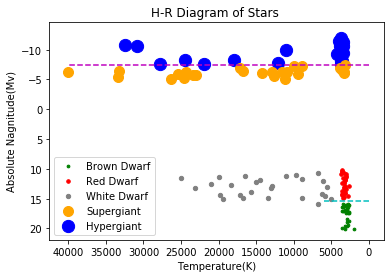

In [23]:
c2=0

for i in range(0,len(y_train)):
    if y_train[i] == 0:
        a = plt.scatter(x_train[i][0],x_train[i][3], s = 30 , c = 'green', marker = '.')
    elif y_train[i]== 1:
        b = plt.scatter(x_train[i][0],x_train[i][3],s = 50 , c = 'red',marker = '.')
    elif y_train[i]== 2:
        c = plt.scatter(x_train[i][0],x_train[i][3],s = 75 , c = 'gray',marker = '.')
    elif y_train[i]== 3:
        d = plt.scatter(x_train[i][0],x_train[i][3],s = 100 , c = 'orange',marker = 'o') 
    elif y_train[i]== 4:
        e = plt.scatter(x_train[i][0],x_train[i][3],s = 150 , c = 'blue',marker = 'o')     
    c2+=1


print("Total Trained Stars = {}".format(c2)) 
plt.xlabel("Temperature(K)")
plt.ylabel("Absolute Nagnitude(Mv)")
plt.title("H-R Diagram of Stars ")
plt.legend((a,b,c,d,e),('Brown Dwarf','Red Dwarf','White Dwarf','Supergiant','Hypergiant'))
m = np.linspace(0,40000,100)
n = (0*m) -7.5
plt.plot(m,n,'--m')
f = np.linspace(0,6000,100)
g = (0*f)+15.4
plt.plot(f,g,'--c')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

## -- Visualizing Tested Data

Total Tested Stars = 60


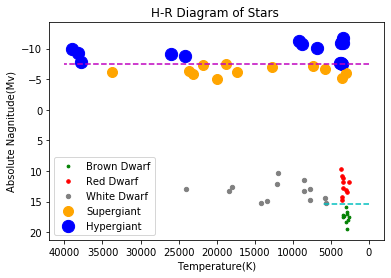

In [24]:
c3=0

for i in range(0,len(y_test)):
    if y_test[i] == 0:
        a = plt.scatter(x_test[i][0],x_test[i][3], s = 30 , c = 'green', marker = '.')
    elif y_test[i]== 1:
        b = plt.scatter(x_test[i][0],x_test[i][3],s = 50 , c = 'red',marker = '.')
    elif y_test[i]== 2:
        c = plt.scatter(x_test[i][0],x_test[i][3],s = 75 , c = 'gray',marker = '.')
    elif y_test[i]== 3:
        d = plt.scatter(x_test[i][0],x_test[i][3],s = 100 , c = 'orange',marker = 'o')
    elif y_test[i]== 4:
        e = plt.scatter(x_test[i][0],x_test[i][3],s = 150 , c = 'blue',marker = 'o')     
    c3+=1


print("Total Tested Stars = {}".format(c3)) 
plt.xlabel("Temperature(K)")
plt.ylabel("Absolute Nagnitude(Mv)")
plt.title("H-R Diagram of Stars ")
plt.legend((a,b,c,d,e),('Brown Dwarf','Red Dwarf','White Dwarf','Supergiant','Hypergiant'))
m = np.linspace(0,40000,100)
n = (0*m) -7.5
plt.plot(m,n,'--m')
f = np.linspace(0,6000,100)
g = (0*f)+15.4
plt.plot(f,g,'--c')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

## -- Visualizing Predicted data

Total Predicted Stars = 60


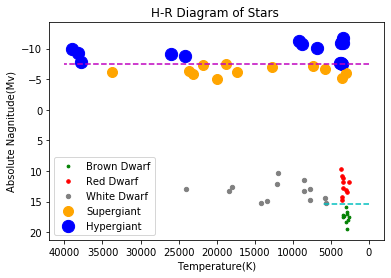

Accuracy = 100.0 %


In [25]:
c4 = 0

for i in range(0,len(z)):
    if np.array_equal(z[i],arr[0]):
        a = plt.scatter(x_test[i][0],x_test[i][3], s = 30 , c = 'green', marker = '.')
    elif np.array_equal(z[i],arr[1]):
        b = plt.scatter(x_test[i][0],x_test[i][3],s = 50 , c = 'red',marker = '.')
    elif np.array_equal(z[i],arr[2]):
        c = plt.scatter(x_test[i][0],x_test[i][3],s = 75 , c = 'gray',marker = '.')
    elif np.array_equal(z[i],arr[3]):
        d = plt.scatter(x_test[i][0],x_test[i][3],s = 100 , c = 'orange',marker = 'o')
    elif np.array_equal(z[i],arr[4]):
        e = plt.scatter(x_test[i][0],x_test[i][3],s = 150 , c = 'blue',marker = 'o')     
    c4+=1

print("Total Predicted Stars = {}".format(c4)) 
plt.xlabel("Temperature(K)")
plt.ylabel("Absolute Nagnitude(Mv)")
plt.title("H-R Diagram of Stars ")
plt.legend((a,b,c,d,e),('Brown Dwarf','Red Dwarf','White Dwarf','Supergiant','Hypergiant'))
m = np.linspace(0,40000,100)
n = (0*m) -7.5
plt.plot(m,n,'--m')
f = np.linspace(0,6000,100)
g = (0*f)+15.4
plt.plot(f,g,'--c')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()
print("Accuracy = {} %".format(val_acc*100))

## Saving Trained data in a pickle for future use

In [26]:
import pickle

data = np.hstack((x_f_train,y_f_train))    # Merging the label column (y_test) with the X_test  i.e the total training set

with open("model.pickle","wb") as f:
    pickle.dump( data , f)